In [1]:
#all my fave imports in case I need them later
import numpy as np
from scipy.optimize import *
from scipy.integrate import *
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore') #living dangerously

### Problem 3A.)

Here, using the given equations:

$ \dot m_i = r_{X,i}\bar\mu_i-(\mu +\Theta_{m,i})m_i$

$ \dot p_i = r_{L,i} w_i-(\mu +\Theta_{p,i})p_i$

At psuedo steady state, the left hand side of these equations (transient part) is equal to zero.  This gives:

$ r_{X,i}\bar\mu_i=(\mu +\Theta_{m,i})m_i^*$

$ r_{L,i} w_i^*=(\mu +\Theta_{p,i})p_i^*$

Where $m_i^*$ and $p_i^*$ are the psuedo-steady state values of mRNA and protein respectively.

Thus,

$ \frac{r_{L,i} w_i^*}{\mu +\Theta_{p,i}}=p_i^*=K_{L,i} w_i^*$

Where $K_{L,i}=\frac{r_{L,i}}{\mu + \Theta_{p,i}}$.

$w_i^*$, the steady state value of $w_i$ depends on the psuedo steady state mRNA concentration.  

Solving for $m_i^*$,

$ \frac{r_{X,i}\bar\mu_i}{\mu +\Theta_{m,i}}=m_i^*=K_{X,i}\bar\mu_i$

Where $K_{X,i}=\frac{r_{X,i}}{\mu +\Theta_{m,i}}$

Thus, putting these expressions together, we obtain:

$p_i^* = K_{L,i} K_{X,i} \bar \mu_i w_i$

as desired.

### Problem 3b.)

Using constants estimated from bionumbers (and the solutions of the previous prelim avaliable on GitHub (https://github.com/varnerlab/P1-Q1-5440-7770-Soln-S20)) we run the following calculations.

Recall that $\bar \mu_i=\frac{W_1+W_2 f_I}{1+W_1+W_2 f_I}$, where $f_I=\frac{I^n}{K^n+I^n}$

$W_1=0.25$, $W_2=98.75$, $n=1.85$, $K=9*10^{-2}$          (previous prelim)

Additionally, recall $m_i^* [nmol/gDW]=\frac{<n>1*10^{-9}}{A_v <m_c> (1-\alpha)}$

where $<m_c>=4.3*10^{-13} g$ is the total weight of an ecoli cell and $\alpha =0.7$ is the fraction of water in the ecoli cell (from Prelim 1 Solutions). 

Also from Prelim 1, $K_X = 0.575 nmol/gDW$.

From Prelim 1, the data for IPTG yields (https://github.com/gbatsimm/CHEME_5440_PRELIM):

In [2]:
# data in column form [IPTG(mM) , <n>(mRNA/cell) , low(mRNA/cell) , high(mRNA/cell)]
data= np.matrix([[0,19,18,20],    
                 [0.0005,21,17,26],
                 [0.005,41,37,44],
                 [0.012,67,65,69],
                 [0.053,86,84,88],
                 [0.216,93,91,95],
                 [1,93,92,94]])
I=data[:,0] #IPTG data points

n=1.85; K=9.0E-2; W1=0.25; W2=98.75;

fI=np.divide(np.power(I,n),np.add(np.power(K,n),np.power(I,n)))
u_i=(W1+W2*fI)/(1+W1+W2*fI) #u_i values calculated  from data

Av=6.022E23;  mc=4.3E-13;  alpha=0.7;

m_i=data[:,1]*1.0E9/(Av*mc*(1-alpha))  #m_i* values calculated from data

| Parameter | Value | Units | Source |Explanation|
|:---------:|:-----:|:-----:|:------:|:---------:|
|$W_1$ | 0.25 | |Prelim Solutions | |
|$W_2$ | 98.74 | | Prelim Solutions| |
| n|1.85 | |Prelim Solutions | |
|K |0.09 | mM|Prelim Solutions | |
|$K_{X,i}$ | 0.575 | nmol/gDW | Prelim Solutions| Transcription Gain |
|$<m_c>$ |$4.3*10^{-13}$ | g |Given | Water weight of Ecoli Cell|
|$ \alpha$|0.7 | |Given | % water in Ecoli Cell |
|$w_i $| 1| |Given | |
|$K_p $|1 (part b), >1 (part c) | | Given| Polysome Amplification|
|$\tau_D $|40 | min|Given |Ecoli Doubling Time |
|$\tau_{1/2} $| 24| hours| Given| Protein Half Life|
|$\tau_L $|1.5 |s |Given |Translational Initiation Time |
|$k_{L,i} $|16.5 |aa/s| PS 2 Solutions| Translation Elongation Rate|
|$R_{L,T} $|2.3 |$\mu M$ | PS 2 Solutions | Ribosome Concentration |
|$L_{protein} $|300 |aa |Given |Protein Length |
|$L_{char} $|333 |aa |Given |Characteristic Protein Length |
|$V $|1 |$\mu m^3$ | Given| Cell Volume|
|$k_{L,i} $|200 |$\mu M$ |Given |Translation Saturation Coefficient |

Now for calculated values::


| Parameter | Value | Units | Formula |Explanation|
|:---------:|:-----:|:-----:|:------:|:---------:|
|$\mu $| 0.0173 | $min^{-1}$|ln(2)/$\tau_D$ | Growth Rate|
|$\Theta_{p,i} $| 0.000481 | $min^{-1}$| ln(2)/$\tau_{1/2}$ | Degradation Rate 
|$k_{e,i}^L $|3.3 | $min^{-1}$ | $k_{L,i}/L_{protein}$ | Elongation Rate |
|$K_{L,i} $| 1.422 | |From Formula Below|Translation Gain |



$K_{L,i}=\frac{r_{L,i}}{\mu + \Theta_{p,i}}=\frac{k_{e,i}^x R_{L,T}}{(\mu + \Theta_{p,i})\tau_{L,i}k_{L,i}}=\frac{(3.3 min^{-1})(2.3 \mu M)}{((0.0173 min^{-1})+(0.000481 min^{-1}))(1.5 s)(200 \mu M)}$.

Now, we use the findings from part A and B to graph:

$p_i^* = K_{L,i} K_{X,i} \bar \mu_i w_i$

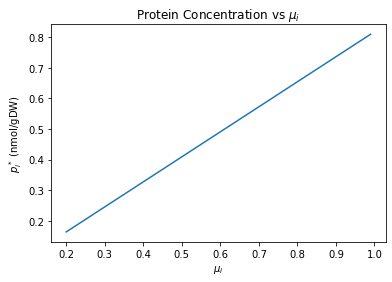

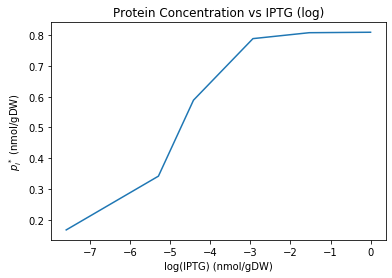

In [3]:
#factor to multiply by to obtain p
p=u_i*1.422*1*0.575

plt.plot(u_i,p);
plt.ylabel('$p_i^*$ (nmol/gDW)');
plt.xlabel('$ \mu_i $');
plt.title('Protein Concentration vs $\mu_i$');
plt.show()

plt.plot(np.log(I),p);
plt.ylabel('$p_i^*$ (nmol/gDW)');
plt.xlabel('log(IPTG) (nmol/gDW)');
plt.title('Protein Concentration vs IPTG (log)');

The first plot shows protein concentration as a function of $\bar \mu_i$ while the second plot relates protein concentration vs IPTG inhibitor (on a log scale).

### Problem 3c.)

In the case where $K_p$ is greater than one, the plot from b is scaled upwards in a direct relationship with $K_p$.  This is easily seen from:

$p_i^* = K_{L,i} K_P K_{X,i} \bar \mu_i w_i$ 

where $p_i^*$ is clearly directly proportional to $K_p$.  This is shown in the plots below where $K_p=2$: 

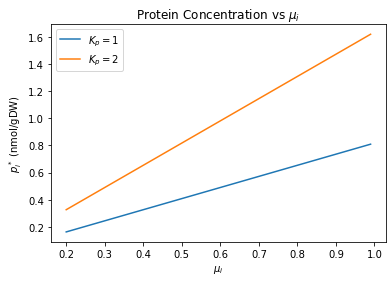

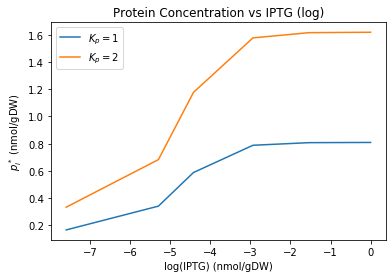

In [4]:
#factor to multiply by to obtain p

p2=u_i*1.422*2*0.575

plt.plot(u_i,p,label='$K_p=1$');
plt.plot(u_i,p2,label='$K_p=2$');
plt.ylabel('$p_i^*$ (nmol/gDW)');
plt.xlabel('$ \mu_i $');
plt.legend(loc='best')
plt.title('Protein Concentration vs $\mu_i$');
plt.show()

plt.plot(np.log(I),p,label='$K_p=1$');
plt.plot(np.log(I),p2,label='$K_p=2$');
plt.ylabel('$p_i^*$ (nmol/gDW)');
plt.xlabel('log(IPTG) (nmol/gDW)');
plt.legend(loc='best')
plt.title('Protein Concentration vs IPTG (log)');